# McStatistics

### Author: Tadd Bindas

A series of mathematical concepts to understand how many miles a single burger is worth



In [5]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import mcstatistics as mc

In [37]:
file_path = Path.cwd() / "../data/mcdonalds-nutrition-facts.pdf"
df : pd.DataFrame = mc.read_menu(file_path, output_path=Path.cwd() / "../data/mcdonalds-burger_facts.csv")

In [7]:
df.head()

,Item Name,Serving Size,Calories,Calories From Fat,Total Fat (g),% Daily Value*,Saturated Fat (g),% Daily Value**,Trans Fat (g),Cholesterol (mg),...,Carbohydrates (g),% Daily Value*,Dietary Fiber (g),% Daily Value*,Sugars (g),Protein (g),Vitamin A,Vitamin C,Calcium,Iron
0,Bacon Clubhouse Burger,9.7 oz,740,370,41,64,16,79,1.5,125,...,51,17,4,14,14,40,8,25,30,25
1,Bacon Clubhouse Grilled Chicken Sandwich,10 oz,610,230,26,39,8,42,0,125,...,50,17,3,14,14,45,8,30,35,15
2,Bacon Clubhouse Buttermilk Crispy Chicken Sand...,10.1 oz,790,360,40,62,11,53,0.5,110,...,67,22,5,18,15,40,8,35,30,25
3,McChicken ®,5.1 oz,370,150,17,26,3.5,16,0,40,...,40,13,2,8,5,14,2,0,10,15
4,Buffalo Ranch McChicken,5.2 oz,370,150,17,26,3.5,17,0,40,...,41,14,2,8,5,14,2,0,15,15


In [34]:
serving_size_mcchicken = float(df.iloc[3]['Serving Size'].strip().split(' ')[0])
serving_size_bigmac = float(df.iloc[16]['Serving Size'].strip().split(' ')[0])
serving_size_mcdouble = float(df.iloc[24]['Serving Size'].strip().split(' ')[0])

serving_size = np.array([ss.strip().split(' ')[0] for ss in df['Serving Size']]).astype(float)
mean_serving_size = np.mean(serving_size)

df["Serving Size (oz)"] = serving_size

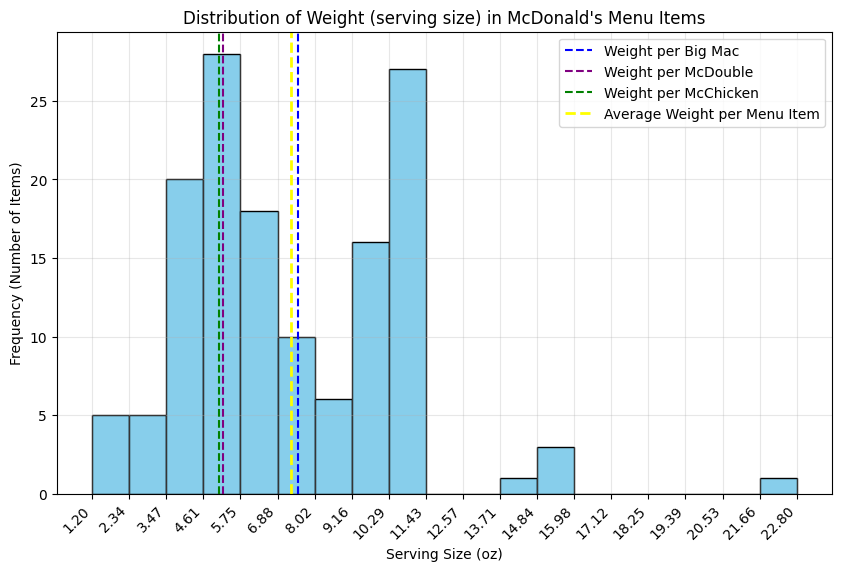

In [33]:
plt.figure(figsize=(10, 6))

bins = np.linspace(np.min(serving_size), np.max(serving_size), 20) 

plt.hist(serving_size, bins=bins, edgecolor='black', color='skyblue', rwidth=2.5)

plt.title('Distribution of Weight (serving size) in McDonald\'s Menu Items')
plt.xlabel('Serving Size (oz)')
plt.ylabel('Frequency (Number of Items)')

plt.axvline(x=serving_size_bigmac, color='blue', linestyle='--', label="Weight per Big Mac")
plt.axvline(x=serving_size_mcdouble, color='purple', linestyle='--', label="Weight per McDouble")
plt.axvline(x=serving_size_mcchicken, color='green', linestyle='--', label="Weight per McChicken")
plt.axvline(x=mean_serving_size, color='yellow', linestyle='--', label="Average Weight per Menu Item", linewidth=2)

plt.legend()

plt.grid(True, alpha=0.3)

plt.xticks(bins)
plt.xticks(rotation=45, ha='right')

plt.show()

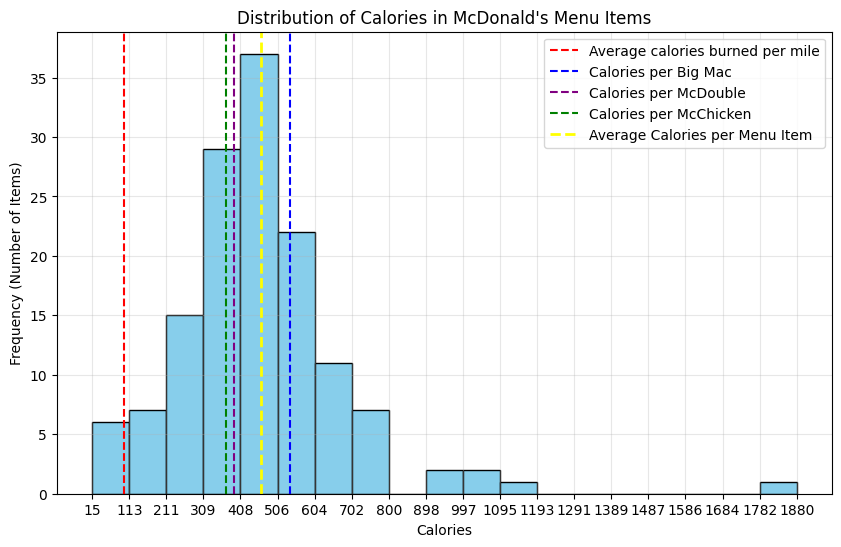

In [23]:
calories_burned_per_mile = 100

plt.figure(figsize=(10, 6))

calories_mcchicken = float(df.iloc[3]["Calories"])
calories_bigmac = float(df.iloc[16]["Calories"])
calories_mcdouble = float(df.iloc[24]["Calories"])

calories = df['Calories'].values.astype(float)
mean_calories = np.mean(calories)

bins = np.linspace(np.min(calories), np.max(calories), 20) 

plt.hist(calories, bins=bins, edgecolor='black', color='skyblue')

plt.title('Distribution of Calories in McDonald\'s Menu Items')
plt.xlabel('Calories')
plt.ylabel('Frequency (Number of Items)')

plt.axvline(x=calories_burned_per_mile, color='red', linestyle='--', label="Average calories burned per mile")
plt.axvline(x=calories_bigmac, color='blue', linestyle='--', label="Calories per Big Mac")
plt.axvline(x=calories_mcdouble, color='purple', linestyle='--', label="Calories per McDouble")
plt.axvline(x=calories_mcchicken, color='green', linestyle='--', label="Calories per McChicken")
plt.axvline(x=mean_calories, color='yellow', linestyle='--', label="Average Calories per Menu Item", linewidth=2)

plt.legend()

plt.grid(True, alpha=0.3)

plt.xticks(bins)

plt.show()

In [36]:
average_weight_food = 2  # lbs
average_weight_food_oz = average_weight_food * 16
oz_per_mile = 8

normalized_weight = df["Serving Size (oz)"].values / oz_per_mile
normalized_weight 

array([1.2125, 1.25  , 1.2625, 0.6375, 0.65  , 0.7125, 0.7625, 0.7125,
       0.625 , 0.9125, 1.3875, 1.375 , 1.3625, 1.35  , 1.325 , 1.3   ,
       0.9375, 0.9125, 1.2875, 0.4375, 0.5   , 0.5   , 0.5   , 0.7125,
       0.65  , 0.7125, 0.85  , 0.575 , 0.5625, 0.55  , 0.7125, 1.    ,
       1.15  , 0.9125, 1.0125, 1.25  , 1.3125, 1.3   , 1.2625, 0.6375,
       0.65  , 0.7125, 0.7625, 0.7125, 0.625 , 1.3875, 1.375 , 1.3625,
       1.35  , 1.325 , 1.3   , 0.7125, 0.575 , 1.425 , 0.425 , 2.85  ,
       1.1875, 0.5625, 1.175 , 1.3   , 1.2875, 0.2875, 1.    , 0.55  ,
       0.9125, 1.0125, 1.2875, 1.25  , 1.375 , 1.35  , 1.3125, 0.5625,
       1.1625, 1.3   , 0.65  , 1.0625, 0.8875, 0.7125, 0.85  , 0.625 ,
       0.4875, 1.1125, 0.6   , 0.6625, 0.5125, 0.7125, 0.7625, 0.625 ,
       0.8875, 0.85  , 1.1875, 1.85  , 0.5   , 0.6625, 0.6   , 0.25  ,
       0.725 , 1.9125, 1.25  , 0.575 , 0.775 , 0.6875, 0.7375, 0.7125,
       0.7875, 0.675 , 1.2625, 1.2   , 1.925 , 1.8625, 1.1125, 1.1   ,
      